**Initial Importations**

In [35]:
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv('CustomerChurn_dataset.csv')

In [37]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Checking the values in the object columns**

In [39]:
for column in data.select_dtypes(include="object"):
    print(data[column].value_counts())
    print()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes      

**Replacing some values in some columns**

In [40]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', '0.00')

In [41]:
#Inspection indicates that the TotalCharges column should be float data type. 
data['TotalCharges'] = data['TotalCharges'].astype(float)

#Inspection of the data tells us the customerID column is not necessary
data = data.drop(['customerID'], axis = 1)

In [42]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Encoding the categorical features**

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded = data.copy()
for column in data.columns:
    data_encoded[column] = le.fit_transform(data[column])
data_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,75,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3625,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,537,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3571,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,3701,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,6305,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,1266,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,1158,1


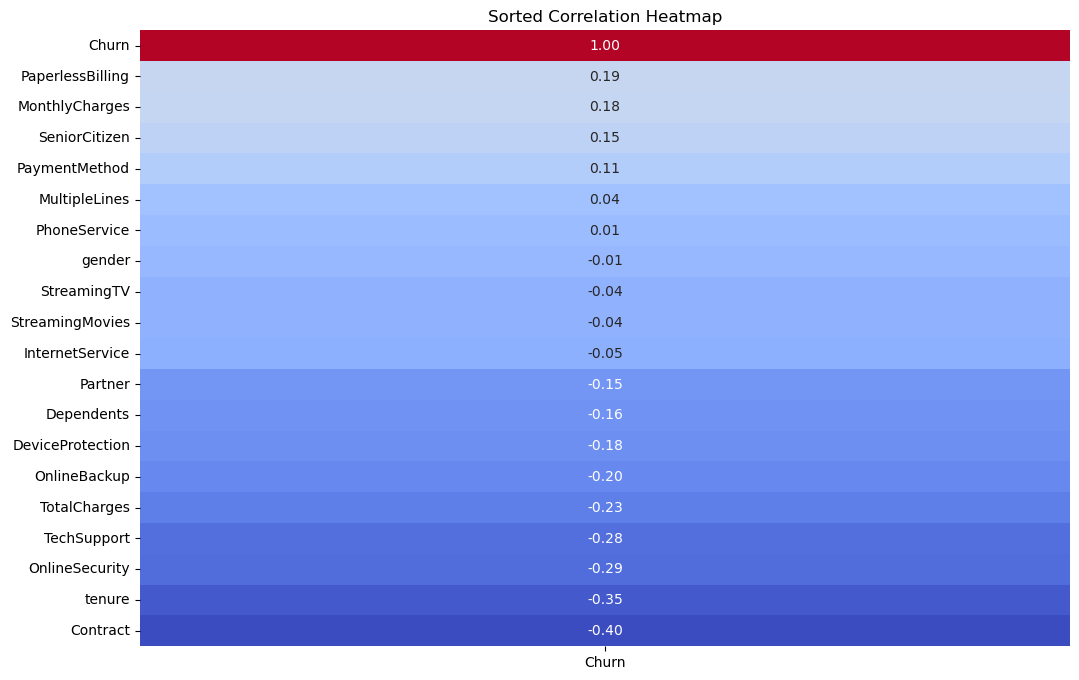

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt

# Assuming data_encoded is your DataFrame
# Create a correlation matrix
corr_matrix = data_encoded.corr()

# Sort the correlation matrix by the correlations with the 'Churn' column
sorted_corr_matrix = corr_matrix['Churn'].sort_values(ascending=False)
relevant_columns = sorted_corr_matrix.index
sorted_corr_matrix = corr_matrix.loc[relevant_columns, ['Churn']]

# Create a heatmap
plt.figure(figsize=(12, 8))
sn.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title('Sorted Correlation Heatmap')
plt.show()


In [45]:
#From the graph, we can see that the columns gender, Partner, Dependents, tenure, InternetService, 
#OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, 
#and TotalCharges have a negative correlation with Churn. 

#We will drop these columns

churn = data.drop(['gender','Partner','Dependents','tenure','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','TotalCharges'], axis=1)
churn.info() #The remaining columns are the features that will be used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   MultipleLines     7043 non-null   object 
 3   StreamingTV       7043 non-null   object 
 4   StreamingMovies   7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   PaymentMethod     7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [46]:
churn['SeniorCitizen'] = churn['SeniorCitizen'].replace([0,1],['No','Yes'])

In [47]:
churn

,SeniorCitizen,PhoneService,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,No,No,No phone service,No,No,Yes,Electronic check,29.85,No
1,No,Yes,No,No,No,No,Mailed check,56.95,No
2,No,Yes,No,No,No,Yes,Mailed check,53.85,Yes
3,No,No,No phone service,No,No,No,Bank transfer (automatic),42.30,No
4,No,Yes,No,No,No,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,No
7039,No,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),103.20,No
7040,No,No,No phone service,No,No,Yes,Electronic check,29.60,No
7041,Yes,Yes,Yes,No,No,Yes,Mailed check,74.40,Yes


In [48]:
print(churn['MonthlyCharges'].max())
print(churn['MonthlyCharges'].min())

118.75
18.25


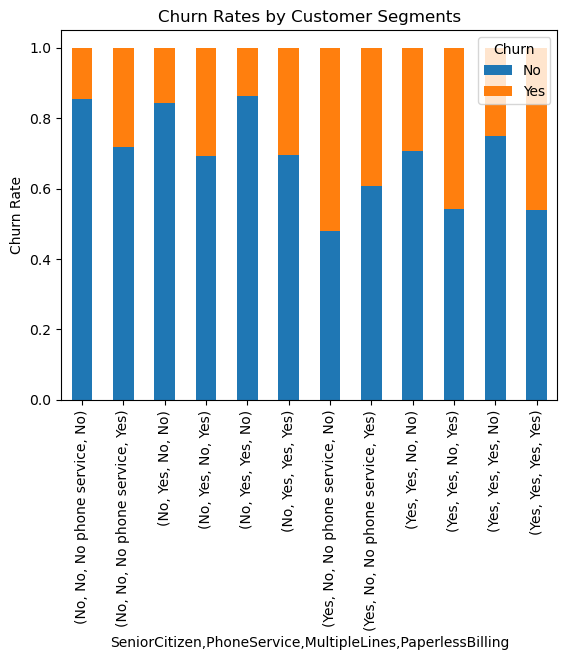

In [49]:
grouped_data = churn.groupby(['SeniorCitizen', 'PhoneService', 'MultipleLines', 'PaperlessBilling'])['Churn'].value_counts(normalize=True).unstack()

# Plot churn rates
grouped_data.plot(kind='bar', stacked=True)
plt.title('Churn Rates by Customer Segments')
plt.ylabel('Churn Rate')
plt.show()


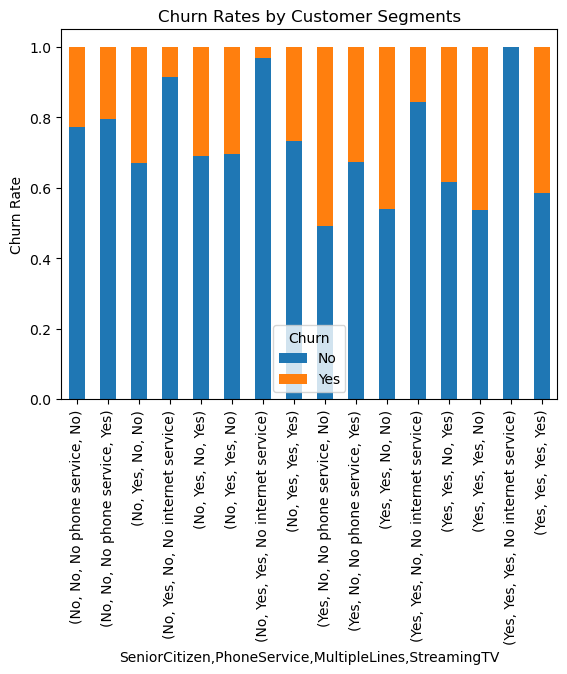

In [50]:
grouped_data = churn.groupby(['SeniorCitizen', 'PhoneService', 'MultipleLines', 'StreamingTV'])['Churn'].value_counts(normalize=True).unstack()

# Plot churn rates
grouped_data.plot(kind='bar', stacked=True)
plt.title('Churn Rates by Customer Segments')
plt.ylabel('Churn Rate')
plt.show()


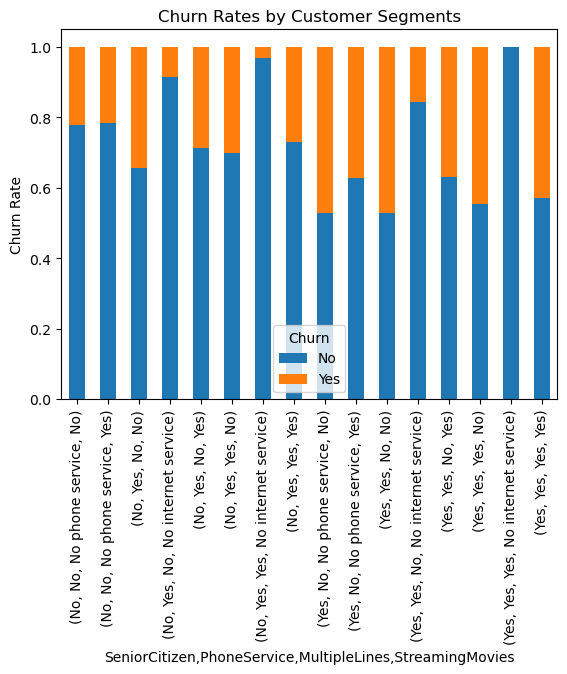

In [51]:
grouped_data = churn.groupby(['SeniorCitizen', 'PhoneService', 'MultipleLines', 'StreamingMovies'])['Churn'].value_counts(normalize=True).unstack()

# Plot churn rates
grouped_data.plot(kind='bar', stacked=True)
plt.title('Churn Rates by Customer Segments')
plt.ylabel('Churn Rate')
plt.show()


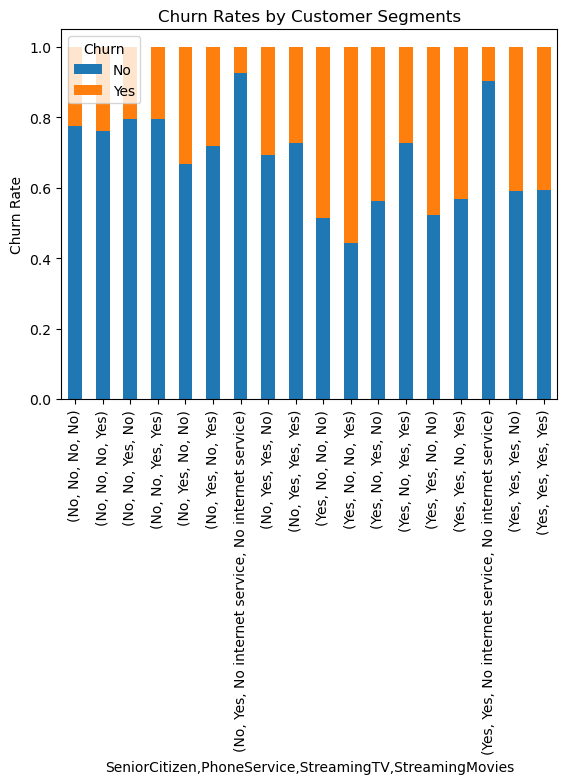

In [52]:
grouped_data = churn.groupby(['SeniorCitizen', 'PhoneService', 'StreamingTV', 'StreamingMovies'])['Churn'].value_counts(normalize=True).unstack()

# Plot churn rates
grouped_data.plot(kind='bar', stacked=True)
plt.title('Churn Rates by Customer Segments')
plt.ylabel('Churn Rate')
plt.show()


In [53]:
churn_encoded = churn.copy()
for column in churn.columns:
    churn_encoded[column] = le.fit_transform(churn[column])
churn_encoded

,SeniorCitizen,PhoneService,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,0,1,2,142,0
1,0,1,0,0,0,0,3,498,0
2,0,1,0,0,0,1,3,436,1
3,0,0,1,0,0,0,0,266,0
4,0,1,0,0,0,1,2,729,1
...,...,...,...,...,...,...,...,...,...
7038,0,1,2,2,2,1,3,991,0
7039,0,1,2,2,2,1,1,1340,0
7040,0,0,1,0,0,1,2,137,0
7041,1,1,2,0,0,1,3,795,1


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

churn_encoded['MonthlyCharges'] = sc.fit_transform(churn_encoded[['MonthlyCharges']])
churn_encoded.head()

,SeniorCitizen,PhoneService,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,0,1,2,-1.131766,0
1,0,1,0,0,0,0,3,-0.387740,0
2,0,1,0,0,0,1,3,-0.517317,1
3,0,0,1,0,0,0,0,-0.872611,0
4,0,1,0,0,0,1,2,0.095041,1


In [55]:
X = churn_encoded.drop('Churn', axis=1)
y = churn_encoded['Churn']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features= len(X), n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [57]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam

In [58]:
# Assuming you have X_train, y_train, X_test1, y_test1 defined

custom_optimizer = Adam(learning_rate=0.001)

# Function to create the model
def create_model(optimizer = custom_optimizer):
    input_layer = Input(shape=(X_train.shape[1],))
    dense1 = Dense(64, activation='relu')(input_layer)
    dense2 = Dense(32, activation='relu')(dense1)
    output_layer = Dense(1, activation='sigmoid')(dense2)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [59]:

# Define parameter grid
param_grid = {
    'epochs': [10, 30, 50],
    'batch_size': [16, 32, 45],
    'optimizer': [Adam(learning_rate=0.001), Adam(learning_rate=0.01), Adam(learning_rate=0.1)],
}

In [60]:

# Create KerasClassifier
model = KerasClassifier(optimizer= param_grid['optimizer'], epochs= param_grid['epochs'], batch_size= param_grid['batch_size'], build_fn=create_model, verbose=True)

# Perform GridSearchCV with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_result = grid.fit(X_train, y_train, verbose=True)


c:\Users\skabs\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
50/50 [==============================] - 1s 7ms/step - loss: 0.7465 - accuracy: 0.5400
Epoch 2/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0761 - accuracy: 0.9925
Epoch 3/30
50/50 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 4/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 5/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 6/30
50/50 [==============================] - 0s 6ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 7/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 8/30
50/50 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 11/30
50/50 [

In [65]:
# Access the best estimator
best_params = grid_result.best_params_
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.583750 using {'batch_size': 16, 'epochs': 30, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x000001FDD9440590>}


In [62]:
input_layer = Input(shape=(X_train.shape[1],))
dense1 = Dense(64, activation='relu')(input_layer)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1, activation='sigmoid')(dense2)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=best_params['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test1, y_test1))

Epoch 1/30
50/50 [==============================] - 1s 12ms/step - loss: 1.9742 - accuracy: 0.4688 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 2/30
50/50 [==============================] - 0s 7ms/step - loss: 1.1838 - accuracy: 0.5150 - val_loss: 0.6935 - val_accuracy: 0.4900
Epoch 3/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.4950 - val_loss: 0.6942 - val_accuracy: 0.4900
Epoch 4/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6901 - accuracy: 0.5075 - val_loss: 0.6950 - val_accuracy: 0.5100
Epoch 5/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6939 - accuracy: 0.4800 - val_loss: 0.6939 - val_accuracy: 0.4900
Epoch 6/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.4487 - val_loss: 0.6936 - val_accuracy: 0.4900
Epoch 7/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6910 - accuracy: 0.4863 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 8/30
50/50 [=

In [63]:
accuracy = model.evaluate(X_test2, y_test2)[1]
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

4/4 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5500
Test Accuracy: 55.00%


In [66]:
from sklearn.metrics import roc_auc_score
# Assuming you have X_train, y_train, X_test1, y_test1 defined and the model is already trained

# Use the trained model to predict probabilities
y_pred_proba = model.predict(X_test2)

# Calculate AUC score
auc_score = roc_auc_score(y_test2, y_pred_proba)
print("AUC Score: {:.4f}".format(auc_score))

4/4 [==============================] - 0s 2ms/step
AUC Score: 0.5000


In [68]:
model.save('churn_predictor.keras')